In [29]:
import osmnx as ox
import networkx as nx

In [30]:
# Tải dữ liệu mạng lưới đường tại TP.HCM
# G = ox.graph_from_place("Ho Chi Minh City, Vietnam", network_type="drive")

In [31]:
# Chuyển thành ma trận kề
# A = nx.to_scipy_sparse_array(G, format="csr")
# print(A.shape, A.nnz)  # kích thước và số phần tử khác 0

In [32]:
# Lấy 1 node bất kỳ
# node_id = list(G.nodes())[0]
# print(G.nodes[node_id])

In [33]:
# Lấy 1 edge bất kỳ
# u, v, key = list(G.edges(keys=True))[0]
# print(G.edges[u, v, key])

In [34]:
# Thuộc tính node
# node_attrs = set()
# for _, data in G.nodes(data=True):
#     node_attrs.update(data.keys())
# print("Node attributes:", node_attrs)

# # Thuộc tính edge
# edge_attrs = set()
# for _, _, data in G.edges(data=True):
#     edge_attrs.update(data.keys())
# print("Edge attributes:", edge_attrs)

In [35]:
# ox.basic_stats(G)

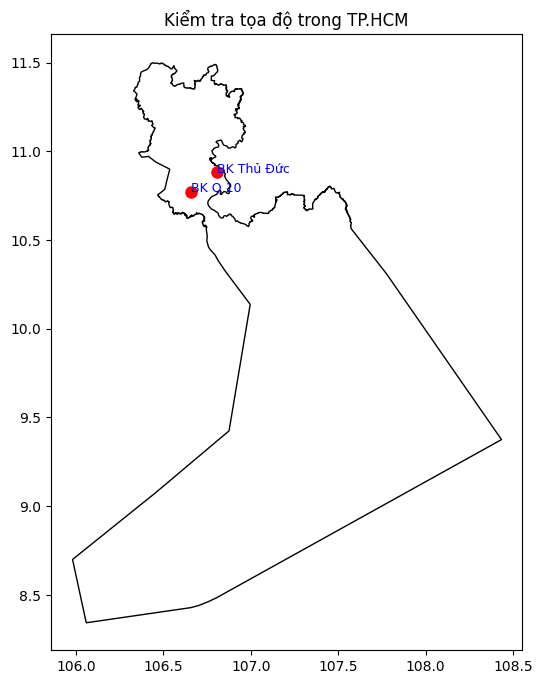

In [45]:
# Lấy tọa độ của Đại học Bách Khoa - Cơ sở Thủ Đức
import matplotlib.pyplot as plt

# Lấy polygon của TP.HCM
hcm = ox.geocode_to_gdf("Thành phố Hồ Chí Minh, Việt Nam")

# Lấy đúng polygon cấp hành chính tỉnh/thành phố (admin_level=4)
# hcm = ox.geocode_to_gdf("Thành phố Hồ Chí Minh, Việt Nam").query("place in ['city','province']")

# Tọa độ muốn kiểm tra
points = {
    "BK Thủ Đức": (10.8805504, 106.8063892),
    "BK Q.10": (10.7720943, 106.6579575)
}

# Vẽ TP.HCM
fig, ax = plt.subplots(figsize=(8, 8))
hcm.plot(ax=ax, facecolor="white", edgecolor="black")

# Vẽ các điểm
for name, (lat, lon) in points.items():
    ax.plot(lon, lat, "ro", markersize=8)   # chú ý: lon trước, lat sau
    ax.text(lon, lat, name, fontsize=9, color="blue")

plt.title("Kiểm tra tọa độ trong TP.HCM")
plt.show()

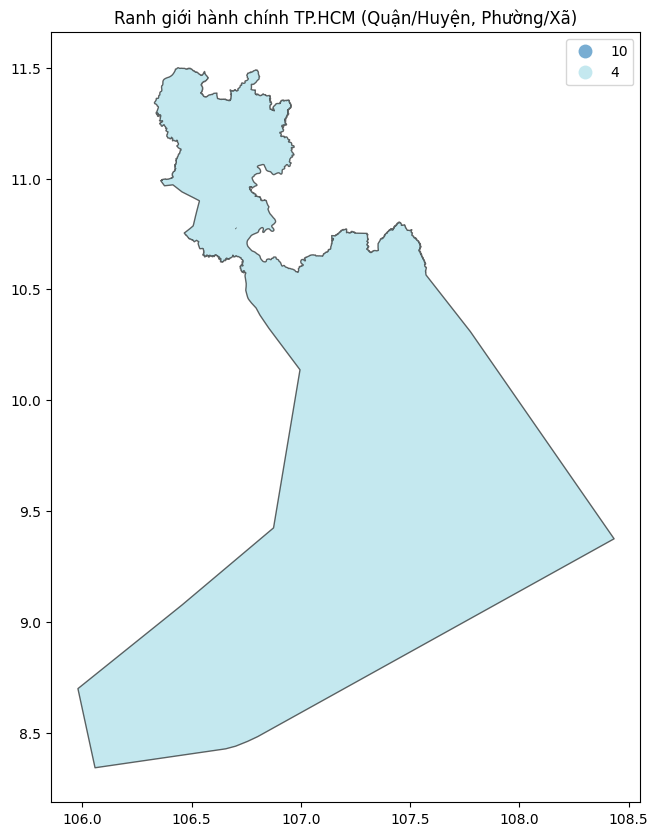

In [73]:
import osmnx as ox
import matplotlib.pyplot as plt

# Lấy ranh giới hành chính (cấp quận/huyện - admin_level=6, cấp phường/xã - admin_level=8)
boundaries = ox.features.features_from_address(
    "Hồ Chí Minh, Việt Nam",
    tags={"boundary": "administrative", "admin_level": ["6", "8"]},
    dist=100
)

# Vẽ bản đồ
fig, ax = plt.subplots(figsize=(10, 10))
boundaries.plot(ax=ax, column="admin_level", cmap="tab20", legend=True, alpha=0.6, edgecolor="black")

plt.title("Ranh giới hành chính TP.HCM (Quận/Huyện, Phường/Xã)")
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\_overpass.py:271: UserWarning: This area is 22 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


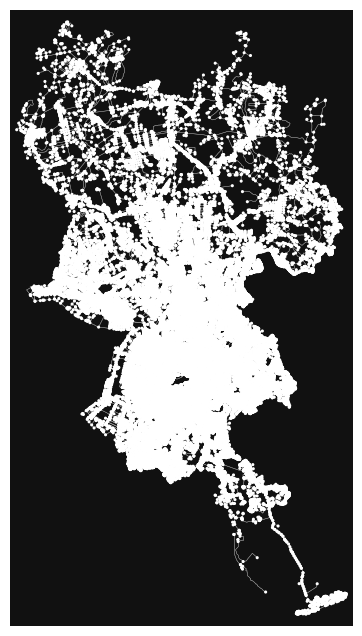

In [74]:
import osmnx as ox
import matplotlib.pyplot as plt

# Lấy mạng lưới đường bộ ở TP.HCM
G = ox.graph_from_place("Ho Chi Minh City, Vietnam", network_type="drive")

# Vẽ bản đồ
fig, ax = ox.plot_graph(G, node_size=5, edge_linewidth=0.3)

In [75]:
print(f"Số nút giao: {len(G.nodes)}")
print(f"Số đoạn đường: {len(G.edges)}")

Số nút giao: 145954
Số đoạn đường: 340553
